# Project: Investigate a Movie Database (TMDb) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The **Movie Database (TMDb)**, including user ratings and revenue.

**Interested questions**:
1. How does movie production change over years?
2. What is the distribution of movie released in differnt month?
3. What's the relationship among popurality, budget, revenues and runtime?
4. What's the distribution of runtime?
5. Who directed the most movies?
6. Which genres are most popular from year to year? 
7. Which genres are associated with movie that has the highest revenues?



In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [178]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('/Users/qingbao/IdeaProjects/Nanodegree/Project3_Investigate_a_dataset/Data/tmdb-movies.csv')

In [308]:
# Look at the dataframe
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [180]:
# Get the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [181]:
# Generate a new csv file named "summary.csv" which only contains columns that I am interested in
headers=['id','original_title','popularity','cast','director','runtime','genres','release_date','vote_count','budget_adj','revenue_adj']
df.to_csv('/Users/qingbao/IdeaProjects/Nanodegree/Project3_Investigate_a_dataset/Data/summary.csv', columns = headers, index=False)

In [4]:
# Read new "summary.csv" file
df_new = pd.read_csv('/Users/qingbao/IdeaProjects/Nanodegree/Project3_Investigate_a_dataset/Data/summary.csv')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [204]:
# Parse the release date to three new individual day, month and year column
df_new['release_date'] = pd.to_datetime(df_new['release_date'], format = '%m/%d/%y')
df_new['release_day'] = df_new['release_date'].dt.day
df_new['release_month']=df_new['release_date'].dt.month
df_new['release_year']=df_new['release_date'].dt.year

In [313]:
# clean null data
df_new = df_new[df_new['genres'].notnull()]
df_new.to_csv('/Users/qingbao/IdeaProjects/Nanodegree/Project3_Investigate_a_dataset/Data/summary.csv')

In [49]:
genres = df_new['genres']

In [314]:
# Split the genres column
def split_pipe_symbol(genre):
    return genre.split("|")

In [ ]:
def split_pipe_symbols(genre):
    return genre.apply(split_pipe_symbol)
df_new['genres'] = split_pipe_symbols(genres)

In [316]:
# Split the cast column
casts = df_new['cast']
def split_cast(cast):
    return cast.split("|")

In [318]:
def split_casts(cast):
    return cast.apply(split_cast)
df_new['cast'] = split_casts(casts)

In [334]:
df_new.head(1)

,id,original_title,popularity,cast,director,runtime,genres,release_date,vote_count,budget_adj,revenue_adj,release_day,release_month,release_year
0,135397,Jurassic World,32.985763,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,1.379999e+08,1.392446e+09,9,6,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### How does movie production change over years?

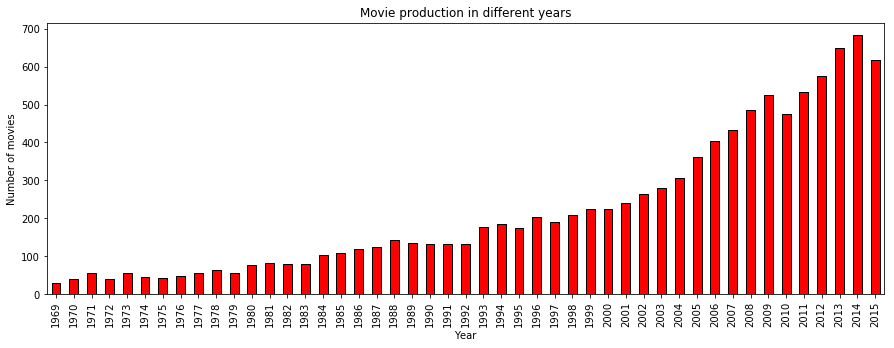

In [682]:
df = df_new.query('release_year<=2015')
number_of_movie_in_year = df.groupby('release_year').count()['release_month']
number_of_movie_in_year.plot(kind='bar',color = 'red',edgecolor='black',figsize = (15,5))
plt.xlabel('Year')
plt.ylabel("Number of movies")
plt.title('Movie production in different years');

In [358]:
number_of_movie_in_year.describe()

count     47.000000
mean     221.361702
std      187.058864
min       30.000000
25%       79.000000
50%      142.000000
75%      294.000000
max      682.000000
Name: release_month, dtype: float64

#### Answers:
- From the figures above we can see that in general, there is a upward trend for movie production. 
- Year 2014 has the highest production which has 682 movies within that year.

### What is the distribution of movie released in differnt month?

In [599]:
df2 = df_new.query('release_year<=2015')
distribution_in_month = df2.groupby(['release_month']).count()['release_day']

In [386]:
distribution_in_month.describe()

count      12.000000
mean      867.000000
std       173.095875
min       665.000000
25%       774.500000
50%       791.000000
75%       896.750000
max      1298.000000
Name: release_day, dtype: float64

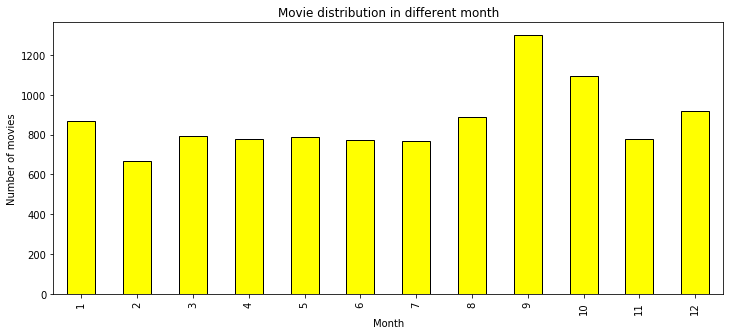

In [685]:
distribution_in_month.plot(kind='bar',color = 'yellow',edgecolor = 'black',figsize = (12,5))
plt.xlabel('Month')
plt.ylabel("Number of movies")
plt.title('Movie distribution in different month');

#### Answer
- From the figure above, we can see that mostly movies are released in September and October, and September has the largest number.

### What's the relationship among popurality, budget, revenues and runtime?

In [461]:
popularity = df_new['popularity']
budget = df_new['budget_adj']
revenues = df_new['revenue_adj']
runtime = df_new['runtime']
scaled_budget = (budget/budget.std())

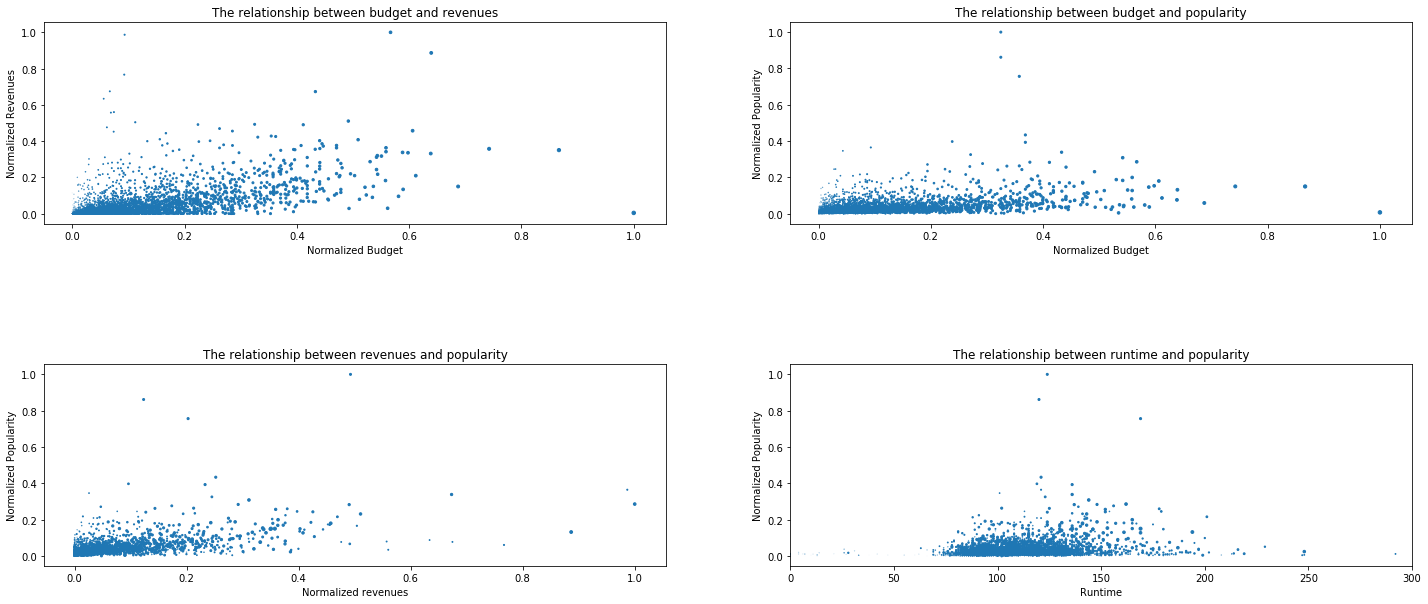

In [462]:
f = plt.subplots(2,2,figsize=(10,10))
plt.subplot(221)
plt.scatter(budget/budget.max(),revenues/revenues.max(),scaled_budget)
plt.xlabel('Normalized Budget')
plt.ylabel('Normalized Revenues')
plt.title('The relationship between budget and revenues')

plt.subplot(222)
plt.scatter(budget/budget.max(),popularity/popularity.max(),scaled_budget)
plt.xlabel('Normalized Budget')
plt.ylabel('Normalized Popularity')
plt.title('The relationship between budget and popularity')

plt.subplot(223)
plt.scatter(revenues/revenues.max(),popularity/popularity.max(),scaled_budget)
plt.xlabel('Normalized revenues')
plt.ylabel('Normalized Popularity')
plt.title('The relationship between revenues and popularity')

plt.subplot(224)
plt.scatter(runtime,popularity/popularity.max(),scaled_budget)
plt.xlim(0,300)
plt.xlabel('Runtime')
plt.ylabel('Normalized Popularity')
plt.title('The relationship between runtime and popularity')

plt.subplots_adjust(left=0.1,right=2.0,wspace=0.2,hspace = 0.7)
plt.show();


#### Answer:
- From the ploted figures above we can see that:
    - The budget and revenues has a positive relation, fairly weak, and possibly
linear.
    - For pupularity with budget, revenues or runtime, does not seem to be any relationship here.
    

### What's the distribution of runtime?

In [31]:
# Query runtime which is less than 200mins, because normally the runtime will not exceed 3 hours
runtime = df_new.query('runtime <200').groupby('runtime').count()['id']
runtime.describe()

count    190.000000
mean      56.110526
std       91.738260
min        1.000000
25%        4.250000
50%        8.500000
75%       62.750000
max      543.000000
Name: id, dtype: float64

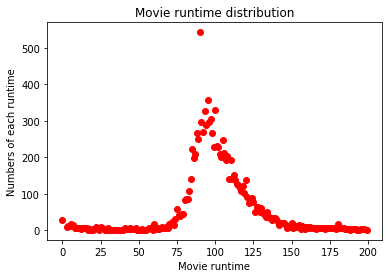

In [67]:
plt.plot(runtime,'ro')
plt.xlabel("Movie runtime")
plt.ylabel('Numbers of each runtime')
plt.title('Movie runtime distribution')
plt.show()

#### Answer: 
- From the figure we can know that:
    - Normally the movie runtime is within 90mins to 120mins
    - It is normal distribution

### Who directed the most movies?

In [503]:
director = df_new.groupby('director').count()['id']
print (director.max())
print (director.idxmax())

45
Woody Allen


In [504]:
print ('{} is the one who has directed the most movies ({} movies)'.format(director.idxmax(),director.max()) )

Woody Allen is the one who has directed the most movies (45 movies)


#### Answer:
- Woody Allen has directed the most movies from year to year. 

### Which genres are most popular from year to year? 

In [662]:
# Get the genres from the file
genres = df_new['genres']
# Count each kind of genres and store them in a dictionary
statistics = {}
for types in genres:
    for type in types:
        if type not in statistics:
            statistics[type] = 1
        else:
            statistics[type] += 1
print(statistics)

{'Action': 2377, 'Adventure': 1465, 'Science Fiction': 1222, 'Thriller': 2903, 'Fantasy': 908, 'Crime': 1354, 'Western': 164, 'Drama': 4747, 'Family': 1214, 'Animation': 664, 'Comedy': 3775, 'Mystery': 808, 'Romance': 1708, 'War': 268, 'History': 330, 'Music': 399, 'Horror': 1636, 'Documentary': 470, 'TV Movie': 162, 'Foreign': 184}


In [663]:
# Sort the dictionary by value
sorted_statistics = sorted(statistics.items(), key=lambda value: value[1])

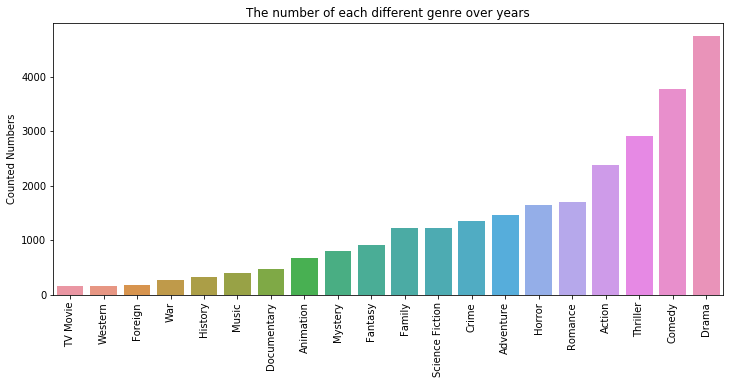

In [686]:
# Plot the genres
fig = plt.subplots(figsize=(12,5))
genre = [x[0] for x in sorted_statistics]
counts = [x[1] for x in sorted_statistics]
fig = sns.barplot(genre, counts)
plt.xticks(rotation=90)
plt.ylabel("Counted Numbers")
plt.title("The number of each different genre over years")
plt.show()


####  Answer:
- From the figure above we can see that the most popular genre is **_Drama_** from year to year, which totally has **2377**;
- The top 4 genres are **_Drama, Comedy, Thriller and Action_**.
- The most unpopular genre is **_TV Movie_**, which only has **162**.

### Which genres are associated with movie that has the highest revenues?

In [61]:
# Get revenue data
revenue = df_new['revenue_adj']

In [62]:
# Get the general description of revenue
revenue.describe()

count    1.073200e+04
mean     5.200147e+07
std      1.454192e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.470526e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [63]:
# Get the corresponded genres of movie with highest revenues
genres[df3.idxmax()]

"['Action', 'Adventure', 'Fantasy', 'Science Fiction']"

#### Answer:
- The movie with highest revenues is belong to action, adventure, fantasy, or science fiction movie.

<a id='conclusions'></a>
## Conclusions


Through the whole data analysis with the movie database, we can see that the production of the movie increases from year by year and the highest production appeared in 2014 with 682 movies. And normally the movies are released bewteen September and October, with runtime controled within 90 to 120 minutes. The top 4 popular genres are Drama, Comedy, Thriller and Action where the 2377 movies are drama while TV Movie shows the most unpopular genre.
There is a fairly weak, possibly linear and positive relationship between budget and revenues while it doesn't seem to be any relationship appear between popularity with runtime, revenues or budget.